# [Python で画像の代表色 (?) を取る練習](https://qiita.com/kitsuyui/items/e8ea67770c45011c7aca)

In [10]:
import argparse

import numpy

import PIL
import PIL.ImageDraw
import scipy
import scipy.cluster
import scipy.misc

def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('source_image')
    parser.add_argument('summary_image')
    parser.add_argument('-n', type=int, default=4)
    args = parser.parse_args()
    img = PIL.Image.open(args.source_image)
    c = args.n + 1
    colors = top_n_colors(img, top_n=args.n, num_of_clusters=c)
    save_summary_image(args.summary_image, colors)


def pillow_image_to_simple_bitmap(pillow_image):
    small_img = pillow_image.resize((100, 100))
    #bitmap = scipy.misc.fromimage(small_img)
    bitmap = numpy.asarray(small_img)
    shape = bitmap.shape
    bitmap = bitmap.reshape(scipy.product(shape[:2]), shape[2])
    bitmap = bitmap.astype(numpy.float)
    return bitmap


def top_n_colors(pillow_image, top_n, num_of_clusters):
    clustering = scipy.cluster.vq.kmeans
    bitmap = pillow_image_to_simple_bitmap(pillow_image)
    clusters, _ = clustering(bitmap, num_of_clusters)
    quntized, _ = scipy.cluster.vq.vq(bitmap, clusters)
    histgrams, _ = scipy.histogram(quntized, len(clusters))
    order = numpy.argsort(histgrams)[::-1][:top_n]
    for idx in range(top_n):
        rgb = clusters.astype(int)[order[idx]].tolist()
        yield '#{:02x}{:02x}{:02x}'.format(*rgb)


def save_summary_image(path, color_codes, width=300, height=100):
    color_codes = tuple(color_codes)
    image = PIL.Image.new('RGB', (width, height))
    draw = PIL.ImageDraw.Draw(image)
    single_width = width / len(color_codes)
    for i, color_code in enumerate(color_codes):
        starting = (int(single_width * i), 0)
        ending = (int(single_width * (i + 1)), height)
        draw.rectangle([starting, ending], fill=color_code)
    image.save(path, format='png')

#if __name__ == '__main__':
#    main()

In [2]:
!curl --output kimetsu.jpg https://images-na.ssl-images-amazon.com/images/I/811YHDsIdSL._SX600_.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80149  100 80149    0     0   414k      0 --:--:-- --:--:-- --:--:--  414k


In [22]:
n = 4
img = PIL.Image.open("kimetsu.jpg")
c = n + 1
colors = top_n_colors(img, top_n=n, num_of_clusters=c)
save_summary_image("kimetsu_summary.png", colors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead


In [14]:
from IPython.display import Image,display_jpeg,display_png

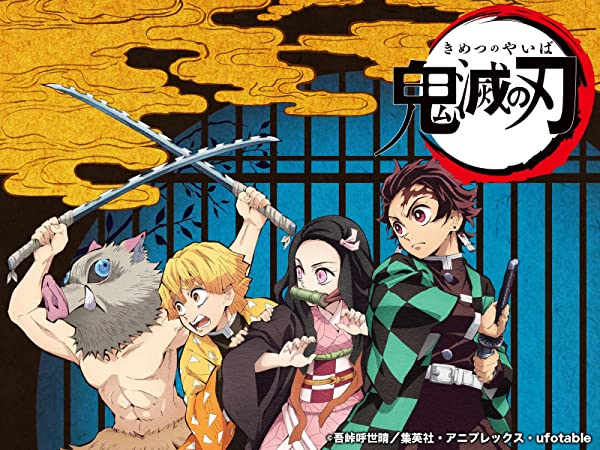

In [23]:
display_jpeg(Image('kimetsu.jpg'))

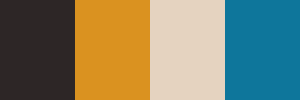

In [24]:
display_png(Image('kimetsu_summary.png'))